In [23]:
import numpy as np
import copy
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from sklearn.metrics import matthews_corrcoef

In [2]:
data = []
with open('data.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        data.append(row)

In [3]:
data = data[1:]

In [4]:
data = np.array(data)

In [5]:
data = data[:,1:]

In [6]:
labels = []
with open('label.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        labels.append(row)

In [7]:
labels = labels[1:]

In [8]:
labels = np.array(labels)[:,1:]

# Exp 2

In [9]:
data = data.astype(np.float)

In [10]:
data.shape

(183, 20502)

In [11]:
labels = labels.reshape((len(labels))).astype(np.float)

In [12]:
labels.shape

(183,)

In [13]:
u,c = np.unique(labels, return_counts = True)

In [14]:
u

array([0., 1.])

In [15]:
c

array([  4, 179], dtype=int64)

# Now process

In [ ]:
#X_scaled = preprocessing.scale(data)

In [16]:
scaler = preprocessing.StandardScaler().fit(data) 

In [17]:
scaled_data = scaler.transform(data)

In [18]:
scaled_data[0]

array([-0.2616847 , -0.48330922, -0.22855039, ...,  0.00797542,
        0.01122493, -0.37125452])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size = 0.5, random_state = 42, stratify = labels)

In [20]:
clf = svm.SVC(kernel='linear')

In [21]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
clf.score(X_test, y_test)

0.9782608695652174

In [24]:
pred = clf.predict(X_test)
matthews_corrcoef(y_test, pred)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

In [25]:
clf2 = LinearDiscriminantAnalysis()

In [26]:
len(scaled_data)

183

In [27]:
len(labels)

183

In [28]:
clf2.fit(scaled_data, labels)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [29]:
lda_data = clf2.transform(scaled_data)

In [30]:
len(lda_data)

183

In [31]:
lda_data.shape

(183, 1)

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca_data = pca.transform(scaled_data)

In [35]:
pca_data.shape

(183, 2)

In [36]:
colors = {0:'green', 1:'blue'}

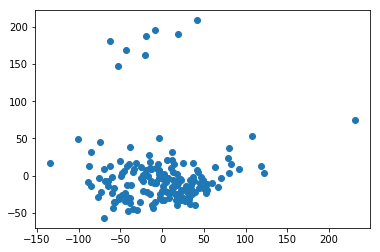

In [38]:
plt.scatter(pca_data[:,:1], pca_data[:,1:], label = labels)  #,cmap=matplotlib.colors.ListedColormap(colors)

In [40]:
import seaborn as sns 
import pandas as pd

In [46]:
pca_data.shape

(183, 2)

In [47]:
df = pd.DataFrame(pca_data, columns=["x", "y"])

In [49]:
df

,x,y
0,28.612417,-14.172475
1,12.175087,-15.176233
2,35.466632,-24.281912
3,5.954788,-21.537250
4,4.988467,-3.194284
5,-7.277973,-7.808411
6,18.120736,-12.411305
7,-13.608325,-8.902022
8,28.600975,-15.618718
9,42.787961,4.787970


In [50]:
df["val"] = pd.Series(labels).apply(lambda x: "red" if x==1 else "blue")

In [51]:
len(df)

183

In [52]:
df

,x,y,val
0,28.612417,-14.172475,red
1,12.175087,-15.176233,red
2,35.466632,-24.281912,red
3,5.954788,-21.537250,red
4,4.988467,-3.194284,red
5,-7.277973,-7.808411,red
6,18.120736,-12.411305,red
7,-13.608325,-8.902022,red
8,28.600975,-15.618718,red
9,42.787961,4.787970,red


[]

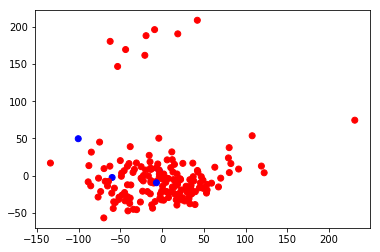

In [56]:
fig, ax = plt.subplots()
ax.scatter(x=df["x"], y=df["y"], c=df["val"])
plt.plot()